<a href="https://colab.research.google.com/github/syaify27/Urban_Analytic/blob/main/kode_lstm_urban_analytic_Time_Series_Prediction_with_LSTM_Using_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Prediction with LSTM Using PyTorch

This kernel is based on *datasets* from

[Time Series Forecasting with the Long Short-Term Memory Network in Python](https://machinelearningmastery.com/time-series-forecasting-long-short-term-memory-network-python/)

[Time Series Prediction with LSTM Recurrent Neural Networks in Python with Keras](https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/)


## Download Dataset

In [ ]:
#!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/shampoo.csv

In [ ]:
!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

--2024-05-17 02:50:24--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2180 (2.1K) [text/plain]
Saving to: ‘airline-passengers.csv’

airline-passengers. 100%[===================>]   2.13K  --.-KB/s    in 0s      

2024-05-17 02:50:24 (31.0 MB/s) - ‘airline-passengers.csv’ saved [2180/2180]



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Library

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

## Data Plot

In [ ]:
training_set = pd.read_csv('/content/drive/MyDrive/kuliah/studio/urban analitik/tugas besar kelompok/weather-1.csv')
training_set

,DATE,CH,HH,KA,KU,PM,TU,TEMP,BANJIR
0,1/4/2024,195.6,23.0,4.0,85.0,36.0,921.8,23.8,0.0
1,2/4/2024,191.2,26.0,4.0,81.0,48.0,922.0,23.1,0.0
2,3/4/2024,240.8,22.0,7.0,71.0,81.0,921.6,23.8,0.0
3,4/4/2024,304.8,21.0,5.0,75.0,66.0,922.1,23.9,0.0
4,5/4/2024,286.5,21.0,2.0,68.0,90.0,921.9,24.6,0.0
...,...,...,...,...,...,...,...,...,...
235,8/23/2024,30.0,4.0,2.1,77.0,49.0,926.0,23.9,0.0
236,9/23/2024,18.0,1.0,2.4,79.0,47.0,925.9,24.7,0.0
237,10/23/2024,62.0,4.0,2.9,80.0,44.0,926.4,25.5,1.0
238,11/23/2024,239.0,18.0,4.9,80.0,52.0,924.8,24.8,5.0


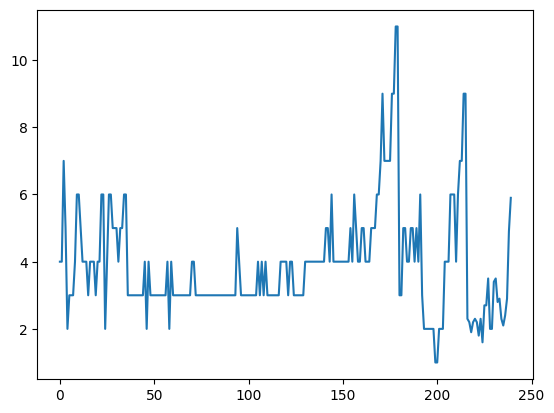

[[ 4. ]
 [ 4. ]
 [ 7. ]
 [ 5. ]
 [ 2. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 4. ]
 [ 6. ]
 [ 6. ]
 [ 5. ]
 [ 4. ]
 [ 4. ]
 [ 4. ]
 [ 3. ]
 [ 4. ]
 [ 4. ]
 [ 4. ]
 [ 3. ]
 [ 4. ]
 [ 4. ]
 [ 6. ]
 [ 6. ]
 [ 2. ]
 [ 4. ]
 [ 6. ]
 [ 6. ]
 [ 5. ]
 [ 5. ]
 [ 5. ]
 [ 4. ]
 [ 5. ]
 [ 5. ]
 [ 6. ]
 [ 6. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 4. ]
 [ 2. ]
 [ 4. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 4. ]
 [ 2. ]
 [ 4. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 4. ]
 [ 4. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 5. ]
 [ 4. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 4. ]
 [ 3. ]
 [ 4. ]
 [ 3. ]
 [ 4. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 3. ]
 [ 4. ]
 [ 4. ]
 [ 4. ]
 [ 4. ]
 [ 3. ]
 [ 4. ]
 [ 4. ]
 [ 3. ]


In [ ]:
training_set = pd.read_csv('/content/drive/MyDrive/kuliah/studio/urban analitik/tugas besar kelompok/weather-1.csv')
#training_set = pd.read_csv('shampoo.csv')

training_set = training_set.iloc[:,3:4].values

#plt.plot(training_set, label = 'Shampoo Sales Data')
plt.plot(training_set, label = 'CURAH HUJAN')
plt.show()

print(training_set)
print (len(training_set))

## Dataloading

In [ ]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 12
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))
print(np.array(x),np.array(y))

[[[0.3 ]
  [0.3 ]
  [0.6 ]
  ...
  [0.5 ]
  [0.5 ]
  [0.4 ]]

 [[0.3 ]
  [0.6 ]
  [0.4 ]
  ...
  [0.5 ]
  [0.4 ]
  [0.3 ]]

 [[0.6 ]
  [0.4 ]
  [0.1 ]
  ...
  [0.4 ]
  [0.3 ]
  [0.3 ]]

 ...

 [[0.06]
  [0.17]
  [0.17]
  ...
  [0.19]
  [0.13]
  [0.11]]

 [[0.17]
  [0.17]
  [0.25]
  ...
  [0.13]
  [0.11]
  [0.14]]

 [[0.17]
  [0.25]
  [0.1 ]
  ...
  [0.11]
  [0.14]
  [0.19]]] [[0.3 ]
 [0.3 ]
 [0.3 ]
 [0.2 ]
 [0.3 ]
 [0.3 ]
 [0.3 ]
 [0.2 ]
 [0.3 ]
 [0.3 ]
 [0.5 ]
 [0.5 ]
 [0.1 ]
 [0.3 ]
 [0.5 ]
 [0.5 ]
 [0.4 ]
 [0.4 ]
 [0.4 ]
 [0.3 ]
 [0.4 ]
 [0.4 ]
 [0.5 ]
 [0.5 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.3 ]
 [0.1 ]
 [0.3 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.3 ]
 [0.1 ]
 [0.3 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.3 ]
 [0.3 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 ]
 [0.2 

## Model

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()

        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)

        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))

        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))

        h_out = h_out.view(-1, self.hidden_size)

        out = self.fc(h_out)

        return out

## Training

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()

    # obtain the loss function
    loss = criterion(outputs, trainY)

    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))



Epoch: 0, loss: 0.01622
Epoch: 100, loss: 0.00480
Epoch: 200, loss: 0.00468
Epoch: 300, loss: 0.00462
Epoch: 400, loss: 0.00455
Epoch: 500, loss: 0.00447
Epoch: 600, loss: 0.00437
Epoch: 700, loss: 0.00423
Epoch: 800, loss: 0.00414
Epoch: 900, loss: 0.00442
Epoch: 1000, loss: 0.00368
Epoch: 1100, loss: 0.00358
Epoch: 1200, loss: 0.00353
Epoch: 1300, loss: 0.00349
Epoch: 1400, loss: 0.00344
Epoch: 1500, loss: 0.00340
Epoch: 1600, loss: 0.00335
Epoch: 1700, loss: 0.00330
Epoch: 1800, loss: 0.00325
Epoch: 1900, loss: 0.00321


## Testing for Airplane Passengers Dataset

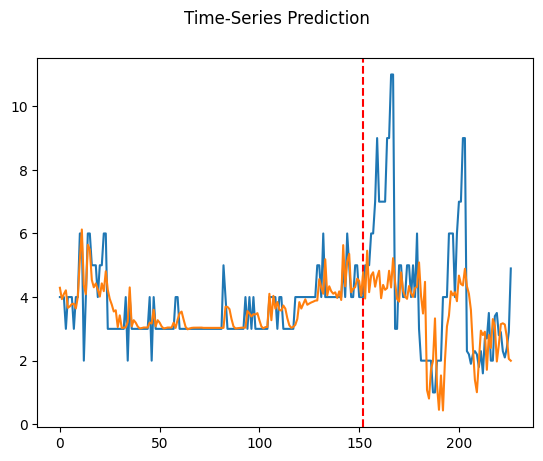

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()



In [ ]:
def relative_accuracy(actual, predicted):
    correct_predictions = sum((actual[i] > actual[i-1] and predicted[i] > predicted[i-1]) or
                              (actual[i] < actual[i-1] and predicted[i] < predicted[i-1])
                              for i in range(1, len(actual)))

    total_predictions = len(actual) - 1

    relative_accuracy = correct_predictions / total_predictions * 100

    return float(relative_accuracy)

accuracy = relative_accuracy(dataY_plot, data_predict)
print("Akurasi Relatif: {:.2f}%".format(accuracy))

Akurasi Relatif: 21.68%


<ipython-input-107-1d7f8072c240>:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(relative_accuracy)


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set model ke mode evaluasi
lstm.eval()

# Lakukan prediksi pada data keseluruhan
train_predict = lstm(dataX)

# Konversi hasil prediksi dan data asli ke numpy array
data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

# Balikkan scaling pada hasil prediksi dan data asli
data_predict = sc.inverse_transform(data_predict)
dataY_plot = sc.inverse_transform(dataY_plot)

# Hitung MSE dan MAE
mse = mean_squared_error(dataY_plot, data_predict)
mae = mean_absolute_error(dataY_plot, data_predict)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
# Hitung korelasi antara prediksi dan data asli
data_combined = np.hstack((dataY_plot, data_predict))
correlation_matrix = np.corrcoef(data_combined.T)


MSE: 1.6897591352462769
MAE: 0.7794332504272461


In [ ]:


# Simpan model
model_path = "lstm_model.pth"
torch.save(lstm.state_dict(), model_path)
print(f"Model disimpan di {model_path}")



Model disimpan di lstm_model.pth


In [ ]:
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# Fungsi untuk membuat sliding windows
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data) - seq_length):
        _x = data[i:(i + seq_length)]
        _y = data[i + seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x), np.array(y)

# Data dan preprocessing
# Gantilah dengan data Anda, contoh di bawah menggunakan data acak
training_set = np.sin(np.linspace(0, 100, 200)).reshape(-1, 1)

sc = MinMaxScaler()
training_data = sc.fit_transform(training_set)

seq_length = 10
x, y = sliding_windows(training_data, seq_length)

train_size = int(len(y) * 0.67)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

print(np.array(x), np.array(y))

# Definisikan model LSTM
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

# Hyperparameters
num_epochs = 2000
learning_rate = 0.01
input_size = 1
hidden_size = 2
num_layers = 1
num_classes = 1

# Buat model LSTM
lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

# Tentukan loss function dan optimizer
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()

    # Hitung loss function
    loss = criterion(outputs, trainY)

    # Backpropagation
    loss.backward()

    # Update parameter
    optimizer.step()

    # Cetak setiap 100 epoch
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

# Simpan model
model_path = "lstm_model.pth"
torch.save(lstm.state_dict(), model_path)
print(f"Model disimpan di {model_path}")

# Prediksi dan evaluasi
lstm.eval()  # Set model ke evaluasi mode

train_predict = lstm(trainX)

# Balikkan scaling
train_predict = train_predict.data.numpy()
trainY = trainY.data.numpy()

train_predict = sc.inverse_transform(train_predict)
trainY = sc.inverse_transform(trainY)

# Pastikan panjang prediksi dan data asli sama
min_len = min(len(trainY), len(train_predict))
trainY = trainY[:min_len]
train_predict = train_predict[:min_len]

# Hitung MSE dan MAE
mse = mean_squared_error(trainY, train_predict)
mae = mean_absolute_error(trainY, train_predict)

print(f"MSE: {mse}")
print(f"MAE: {mae}")


[[[0.50034908]
  [0.74147775]
  [0.92298746]
  ...
  [0.31651031]
  [0.11495329]
  [0.00868521]]

 [[0.74147775]
  [0.92298746]
  [1.        ]
  ...
  [0.11495329]
  [0.00868521]
  [0.02398082]]

 [[0.92298746]
  [1.        ]
  [0.95347406]
  ...
  [0.00868521]
  [0.02398082]
  [0.15705829]]

 ...

 [[0.36298709]
  [0.61184388]
  [0.83313363]
  ...
  [0.4513313 ]
  [0.21742094]
  [0.05346445]]

 [[0.61184388]
  [0.83313363]
  [0.97214253]
  ...
  [0.21742094]
  [0.05346445]
  [0.        ]]

 [[0.83313363]
  [0.97214253]
  [0.99450069]
  ...
  [0.05346445]
  [0.        ]
  [0.07024665]]] [[2.39808229e-02]
 [1.57058288e-01]
 [3.75014258e-01]
 [6.23959211e-01]
 [8.42341608e-01]
 [9.76166493e-01]
 [9.92345718e-01]
 [8.86878976e-01]
 [6.85842875e-01]
 [4.38943509e-01]
 [2.07226644e-01]
 [4.79841796e-02]
 [5.88748647e-04]
 [7.67588523e-02]
 [2.57661464e-01]
 [4.98568487e-01]
 [7.39915760e-01]
 [9.22030270e-01]
 [9.99884277e-01]
 [9.54228413e-01]
 [7.96351069e-01]
 [5.65287355e-01]
 [3.181676